In [1]:
#importing required packages

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
#forming a dataframe
df = dataset['train'].to_pandas()


#data cleanup converting date column to date timetype from string type.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

df_DA_US= df[(df['job_title_short'] == 'Data Analyst') &( df['job_country']== 'United States')].copy()

/opt/anaconda3/envs/python_course/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US.head(15)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.00,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.00,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.00,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.00,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.00,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
1587,Data Analyst,Sr Data Analyst,"Long Beach, CA",via Indeed,Full-time,False,"California, United States",2023-02-16 13:00:47,False,True,United States,year,89111.75,NaN,Molina Healthcare,[excel],{'analyst_tools': ['excel']}
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.00,NaN,Western Digital,"[sql, tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
1684,Data Analyst,Data Analyst - Data17829,"Tampa, FL",via Indeed,Full-time,False,"Florida, United States",2023-07-18 13:02:09,True,True,United States,year,120000.00,NaN,Acrisure,"[shell, sql, azure, databricks, linux]","{'cloud': ['azure', 'databricks'], 'os': ['lin..."
1867,Data Analyst,Data Integration Analyst (West Coast/Chicago),"Chicago, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-07-18 13:01:47,False,False,United States,year,101500.00,NaN,Forsta,"[php, python, express]","{'programming': ['php', 'python'], 'webframewo..."
2401,Data Analyst,Data Analytics- Auto Intern,"Dublin, CA",via LinkedIn,Internship,False,"California, United States",2023-12-27 13:01:14,False,False,United States,year,35000.00,NaN,Epicor,[go],{'programming': ['go']}


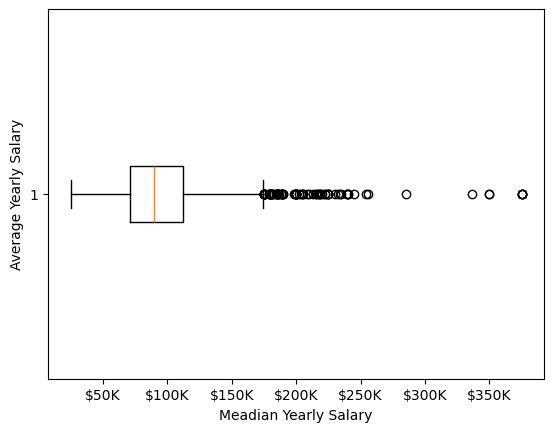

In [3]:
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))
plt.xlabel('Meadian Yearly Salary')
plt.ylabel('Average Yearly Salary')
plt.show()

In [5]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US= df[(df['job_title_short'].isin(job_titles)) &( df['job_country']== 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [6]:
job_list=[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

/var/folders/_h/nlj2nt097kl6npyg7npqnq7c0000gn/T/ipykernel_4780/3671338196.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


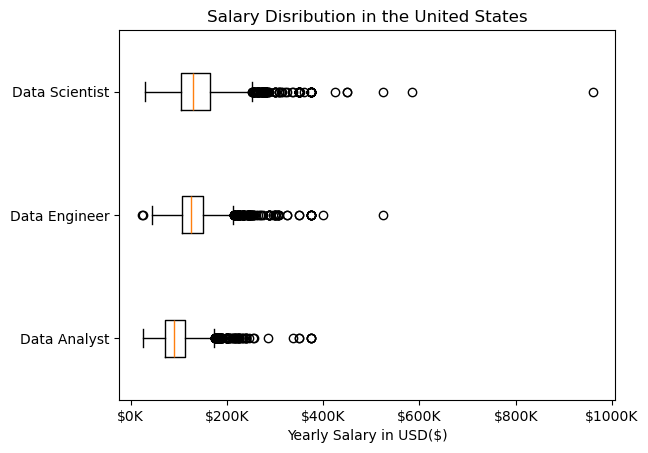

In [8]:

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Disribution in the United States')
plt.xlabel('Yearly Salary in USD($)')
plt.show()